# Group testing for prevalence estimation and disease monitoring

## Introduction

Consider a population of $N$ individuals where a small fraction $k << N$ of them is a carrier for an infectious disease. Both the specific value of $k$ and the carrier individuals are a priori unknown.

Assume furthermore that this disease can be detected via a procedure that analyses a specimen from one or several of the individuals and detects (with possibly a statistical error characterized by its ROC curve) whether the individual (or one among the several) is a carrier or not.

In general, in order to mitigate or monitor the spread of the disease, we will be interested in determining:

1. The **prevalence** of the disease, that is, the exact number $k$, or equivalently, the proportion $k/N$ which we will henceforth denote by $p$
2. The **identification** of the subset $\mathcal{S}$ of $k$ individuals among the $N$ that are carriers, susceptible to infect other individuals, and hence ought to be quarantined or isolated.

### Individual testing

The simplest approach to estimate (1) and (2) is to obtain specimens from each of the $N$ individuals and test them. After this, we will have (potentially noisy) estimates $\hat{k}$ and $\hat{\mathcal{S}}$ of the quantities of interest. We will denote by $\hat{\mathcal{S}}_{FN} \subset \mathcal{S}$ the subset of false negatives that the test discarded
and by $\hat{\mathcal{S}}_{FP} \subset \{1, \cdots, N\}$ the subset of false positives that the test incorrectly marked as infected.

Note that in order to obtain these estimates, we had to perform exactly $N$ tests, which may be prohibitively expensive in time or resources if the population is large. This large cost seems a priori unsurprising: how are we going to find a needle in a haystack without sifting through the entirety of it?


### Dorfman's group testing

It turns out that under certain conditions it is possible to do the same with only a fraction of $N$ tests. The main idea was developed in a 1943 paper from an economist named Robert Dorfman, who at the time was working as a statistician for the US Federal Government during WW II \[1\]. One of the problems the U.S. army faced at the time was the screening of syphilis in drafted soldiers prior to deploying them. While working on this problem, Dorfman made to crucial observations \[2\]:

1. First, since the prevalence of syphilis among the population was low, if you randomly selected a subset $\mathcal{G} \subset \{1, \cdots, N\}$ of size $\left|\mathcal{G}\right|= g < N$ soldiers out of the total $N$, the probability of at least one of them having syphilis was also quite low (for convenience we will assume that $N$ is a multiple of $g$). In fact, and letting $p=k/N$ be the prevalence of the disease, we have:

$P\left(\mbox{one or + infected} | \mathcal{G}\right) = 1 - P\left(\mbox{none infected} | \mathcal{G}\right) = 1 - \left(1 - p\right)^g  = 1 - P_0$

where we have let $P_0 = \left(1 - p\right)^g$.

2. Second, the blood test performed to each individual could also be used with a pooled sample from several individuals. In that case, instead of detecting whether an individual carried the disease, it detected whether at least one in the pool was a carrier.

Putting together these two observations, Dorfman devised the following *group testing* strategy:

1. Divide the $N$ soldiers into groups of $g=5$. 
2. For each group, draw a specimen from each individual and pool it together.
3. Run the test on the pooled sample. 
4. If the test turns positive, test each of the $g$ individuals in the pool, running a total of $g+1$ tests for that pool. Otherwise, if the test turns negative, label the $g$ individuals as non-infected.

At this point it is clear from the first observation above that, since $p$ is small, and **provided the test is errorless**, this procedure will allow us to discard many groups of size 5, without testing each of their individuals individually!

As a matter of fact, under the perfect test assumption it is straightforward to calculate the expected number of tests that this strategy will need to perform. Let's call:
* $T$ the random variable corresponding to the number of tests performed following Dorfman's strategy, 
* $i_j$ the Bernouilli random variables denoting whether individual $j$ is infected or not,
* and $t_n = \max_{j \in \mathcal{G}_n} i_j $ the Bernouilli random variable denoting the outcome of the test for the $n$-th group ($t_n=1$ if the test turns positive, $0$ otherwise). 

For convenience, I'm attaching below a simple figure illustrating the notation convention and setup.

![Notation convention](simple_group_testing_setup.png)

Since the outcome of the test for each group is independent of the others, the expectation of $T$ is given by:

$E\left(T\right) = E\left(\sum_{n=1}^{N/g} I_{t_n=1}\left(g + 1\right) + I_{t_n=0} \right) = \sum_{n=1}^{N/g} E\left(I_{t_n=1}\right)\left(g + 1\right) + E\left(I_{t_n=0} \right)$

Assuming that the test is errorless, we have:

$E\left(I_{t_n=1}\right) = P\left(\mbox{one or + infected} | \mathcal{G}_n\right) = 1 - P_0$

and:

$E\left(I_{t_n=0}\right) = P\left(\mbox{none infected} | \mathcal{G}_n\right) = P_0$

so we obtain:

$E\left(T\right) = \frac{N}{g} \left(\left(1 - P_0\right)\left(g + 1\right) + P_0 \right)$

In order to understand better what is going on, we will consider another quantity, which is normalized by population size, which is also a random variable that we will call "savings" and will denote by:

$\gamma := 1 - \frac{T}{N} \in \left(0, 1\right]$.

This quantity indicates how many tests we save for a given testing strategy relative to the individual testing strategy. The larger it is, the less costly our strategy. Its expectation is given by:

$E\left(\gamma\right) = 1 - \frac{g + 1}{g}\left(1 - P_0\right) - \frac{1}{g}P_0$

It follows that for very small $p$, $P_0 \approx 1 $and the second term is negligible so that the savings are given by:

$E\left(\gamma\right) \approx \frac{g - 1}{g}$

For small enough prevalence, the larger the group the better. But the approximation above is too coarse when $p$ is not very small, and it suggests that a strategy that maximizes the efficiency is that of selecting $g=N$ which is not completely a bad idea if you are certain that the disease is very likely to not be present in a group of $N$ people and want to quickly discard whether to run the test or not. (This is without considering the fact that running a pooled test with $N$ samples is likely to be technically impossible for sufficiently large $g$ or $N$).

Dorfman's paper [2] basically explores $E\left(\gamma\right)$ as a function of $g$ for different values of $p$ to determine the optimal choice of group size. Let's play with the above expression for $E\left(\gamma\right)$:

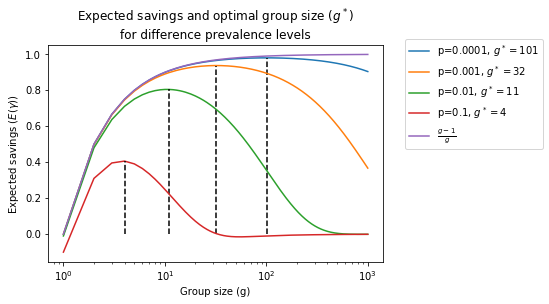

In [1]:
from matplotlib import pyplot as plt
import numpy as np

def approximation(group_size):
    return (group_size-1)/group_size

def expected_savings(p, group_size):
    p_z = np.power(1 - p, group_size)
    p_nz = 1 - p_z
    savings = 1 - (group_size+1)/group_size * p_nz - 1/group_size*p_z
    return savings

p_choices = [1e-4, 1e-3, 1e-2, 1e-1]
g_values = np.arange(1, 1000, step=1)

for p in p_choices:
    savings = np.array([expected_savings(p, g) for g in g_values])
    opt_g = np.argmax(savings)
    plt.semilogx(g_values, savings, label=f'p={p:.2g}, $g^*={g_values[opt_g]}$')
    plt.semilogx([g_values[opt_g], g_values[opt_g]], [0, savings[opt_g]], '--k')
    
plt.semilogx(g_values, [approximation(g) for g in g_values], label='$\\frac{g -1}{g}$')

plt.xlabel('Group size (g)')
plt.ylabel('Expected savings ($E(\gamma)$)')
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.title('Expected savings and optimal group size ($g^*$)\nfor difference prevalence levels')
plt.show()

I'm including below the table of optimum group sizes from the original Dorfman paper. You can see that the values for 
$p=0.1$ and $p=0.01$ coincide with his calculations:

![Optimal group size from Dorfman [2]](dorfman_table.png)

### Estimating prevalence

In the procedure described above, and assuming the testing procedure is errorless, the result of the testing strategy is the subset $\mathcal{S}$ of individuals infected by the disease. But in some situations we may only be interested in estimating $p$ (or equivalently, $k$) without really identifying $\mathcal{S}$. In such situations, we can consider only the Bernouilli outcomes corresponding to each test, $\{t_n\}$ whose parameter is equal to $1-P_0$, and obtain an estimate for $p$ as:

$\hat{p} = 1 - \left(1 - \frac{\sum_{n=1}^{N/g}{t_n}}{N}\right)^{\frac{1}{g}}$

by running only $N/g$ tests.


## Conclusions

We have seen how a very simple idea from the 1940's can be used to estimate prevalence or find infected individuals for a somewhat rare disease without having to test the whole population. While we haven't discuss it yet, the ideas behind Dorfman's strategy can be developed much further to reduce even more the number of tests necessary, from something that scales linearly with the size of the population $N$, to something that scales with $\log N$. We will discuss these extensions in upcoming reports.

The development we have followed was backed by a number of assumptions that may not hold in practice:

1. **The independence of the individuals within a group, as well as independence of the test's outcome across groups**. Both these assumptions need not hold in practice, unless we are careful to select the tested groups truly at random, undoing potential correlations between individuals. For instance, putting members from a same family together in the same pool, or building groups from people who live in a same building or work in a same company would break these assumptions. It is not yet clear from our exposition whether this would have a negative or positive impact in the expected number of tests. We will explore this in the next blog post.

2. **The existence of an errorless test**: Another big assumption we have carried throughout is that the tests are errorless, that is, there is no false positives or negatives. Obviously most tests will involve measuring physical quantities and will carry some uncertainty, which renders this assumption impractical. Furthermore, if a given test procedure for specimens from one individual has some error, performing the test procedure for a specimen coming from a pool of individuals is likely to increase that error. We will also explore this situation in the next blog post.


Given the times we are in, I would be surprised if the reader is not immediately thinking: **can this be applied to COVID-19?** (Of course this post was partially motivated by myself asking the same question.)

I think we need to be very careful about jumping to any conclusions that would require large amounts of research on many aspects that go beyond the knowledge of an engineer or statistician. But to the best of my understanding, there are already 3 institutions experimenting with this possibility: the Nebraska Public Health Laboratory in the US \[3\], Goethe University in Germany \[5\], and the Technion in Israel \[4\], according to their recent published briefs.


## References

\[1\] https://www.informs.org/Explore/History-of-O.R.-Excellence/Biographical-Profiles/Dorfman-Robert

\[2\] https://projecteuclid.org/euclid.aoms/1177731363

\[3\] https://www.significancemagazine.com/science/651-increasing-testing-capacity-for-sars-cov-2-by-pooling-specimens

\[4\] https://www.technion.ac.il/en/2020/03/pooling-method-for-accelerated-testing-of-covid-19/

\[5\] https://aktuelles.uni-frankfurt.de/englisch/pool-testing-of-sars-cov-02-samples-increases-worldwide-test-capacities-many-times-over/

## Updates

* 2020-04-18: The first version of this post contained a small error in the chart "Expected savings and optimal group size ($g^*$)", where the optimal group sizes were incorrectly plotted.